In [1]:
from sklearn import datasets as ds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
iris = ds.load_iris()
X = iris.data
Y = iris.target
Y[ Y > 0 ] = 1
Y[ Y <= 0 ] = -1
d = X.shape[1] # dimension

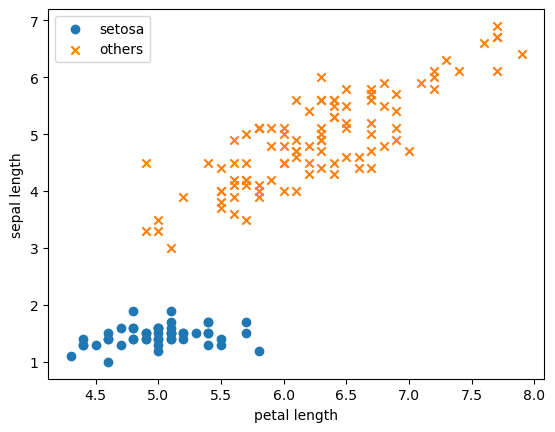

In [2]:
plt.scatter(np.array(X[:50,0]), np.array(X[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(X[50:,0]), np.array(X[50:,2]), marker='x', label='others')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [3]:
class Perceptron:
    def __init__(self, d):
        self.w = np.zeros(d+1)

    def LinearClassifier(self, d):
        return 1 if d > 0 else -1
    
    def fit(self, x_train, y_train):
        # add bias
        x_train = np.c_[np.ones(len(x_train)), x_train]
        while True:
            count = 0
            for i in range(len(x_train)):
                p= self.LinearClassifier(np.dot(x_train[i],self.w))
                if y_train[i] *p<= 0:
                    self.w += y_train[i] * x_train[i]
                    count += 1
            if count == 0:
                break

    def predict(self, x):
        # add bias
        x = np.append(1, x)
        return self.LinearClassifier(np.dot(x, self.w))
    
    def score(self, x_test, y_test):
        count = 0
        for i in range(len(x_test)):
            if self.predict(x_test[i]) == y_test[i]:
                count += 1
        print("Accuracy: ", f"{count/len(x_test)*100:.2f}", "%")

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
perceptron = Perceptron(d)
perceptron.fit(x_train, y_train)

perceptron.score(x_test, y_test)

Accuracy:  100.00 %


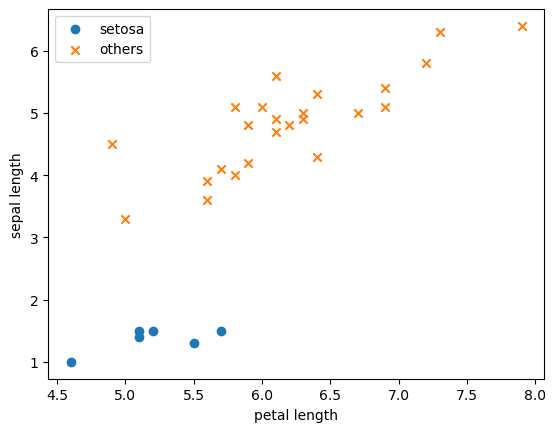

In [7]:
# plot result
setota = np.array([])
others = np.array([])
for x in x_test:
    if perceptron.predict(x) != 1:
        setota = np.append(setota, x)
    else:
        others = np.append(others, x)
#reshape to plot
setota = setota.reshape(-1, d)
others = others.reshape(-1, d)
plt.scatter(setota[:,0], setota[:,2], marker='o', label='setosa')
plt.scatter(others[:,0], others[:,2], marker='x', label='others')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()